### Import Necessary Libraries

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data File

In [239]:
df = pd.read_csv('Loan Data1.csv')
df.head()

,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,loan_purpose,date,loan_granted,loan_repaid
0,494427,1,NaN,NaN,5100,0.70,738,1716,0,0,43,3,investment,3/7/2012,1,0.0
1,494462,1,NaN,NaN,2100,0.42,1262,271,1,27300,29,8,home,9/17/2012,1,0.0
2,494588,0,1.0,1.0,3500,0.72,56,3618,1,31800,26,2,business,2/8/2012,1,0.0
3,494649,1,NaN,NaN,3800,0.90,1273,2359,1,27800,35,8,home,11/21/2012,1,0.0
4,494678,0,1.0,1.0,4200,0.78,1052,1962,1,30900,76,8,investment,12/20/2012,1,0.0


### Summarize Dataset For Eyeballing

In [240]:
df.describe()

,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,loan_granted,loan_repaid
count,44234.000000,44234.000000,20126.000000,20126.000000,44234.000000,40727.000000,44234.000000,44234.000000,44234.000000,44234.000000,44234.000000,44234.000000,44234.000000,17221.000000
mean,724833.209816,0.545011,0.896005,0.400527,3949.875661,0.733525,1685.339309,3007.944274,0.613397,19045.284171,41.549962,3.929918,0.389316,0.500029
std,142988.721594,0.497976,0.305261,0.490017,2126.963576,0.186433,1331.383032,1960.827641,0.486977,18559.173400,12.819046,2.647740,0.487601,0.500015
min,494425.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000
25%,603370.500000,0.000000,1.000000,0.000000,2600.000000,0.610000,808.000000,1640.000000,0.000000,0.000000,32.000000,2.000000,0.000000,0.000000
50%,712203.000000,1.000000,1.000000,0.000000,3900.000000,0.740000,1268.000000,2534.000000,1.000000,18600.000000,41.000000,3.000000,0.000000,1.000000
75%,841683.250000,1.000000,1.000000,1.000000,5400.000000,0.870000,2107.000000,3868.750000,1.000000,33200.000000,50.000000,6.000000,1.000000,1.000000
max,999987.000000,1.000000,1.000000,1.000000,12700.000000,1.090000,10641.000000,13906.000000,1.000000,97200.000000,79.000000,8.000000,1.000000,1.000000


In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44234 entries, 0 to 44233
Data columns (total 16 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   loan_id                                          44234 non-null  int64  
 1   is_first_loan                                    44234 non-null  int64  
 2   fully_repaid_previous_loans                      20126 non-null  float64
 3   currently_repaying_other_loans                   20126 non-null  float64
 4   total_credit_card_limit                          44234 non-null  int64  
 5   avg_percentage_credit_card_limit_used_last_year  40727 non-null  float64
 6   saving_amount                                    44234 non-null  int64  
 7   checking_amount                                  44234 non-null  int64  
 8   is_employed                                      44234 non-null  int64  
 9   yearly_salary               

### Checking & Visualizing Dataset for Null Values for Possible Imputation

In [242]:
df.isnull().sum()


loan_id                                                0
is_first_loan                                          0
fully_repaid_previous_loans                        24108
currently_repaying_other_loans                     24108
total_credit_card_limit                                0
avg_percentage_credit_card_limit_used_last_year     3507
saving_amount                                          0
checking_amount                                        0
is_employed                                            0
yearly_salary                                          0
age                                                    0
dependent_number                                       0
loan_purpose                                           0
date                                                   0
loan_granted                                           0
loan_repaid                                        27013
dtype: int64

<Figure size 720x432 with 0 Axes>

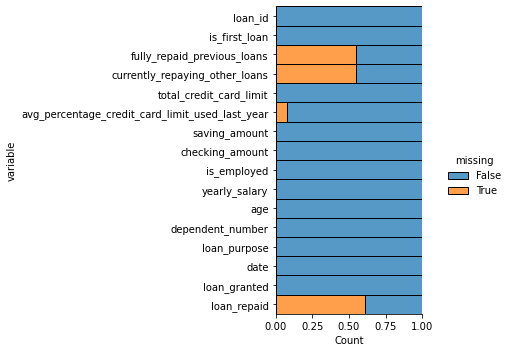

In [243]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

In [244]:
df.fully_repaid_previous_loans.unique()

array([nan,  1.,  0.])

In [245]:
df.currently_repaying_other_loans.unique()

array([nan,  1.,  0.])

In [246]:
df.avg_percentage_credit_card_limit_used_last_year.unique()

array([0.7 , 0.42, 0.72, 0.9 , 0.78, 0.71, 0.39, 0.77, 0.62, 0.74, 0.95,
       0.82, 0.8 , 1.02, 0.45,  nan, 0.84, 1.  , 0.48, 0.94, 0.58, 0.73,
       0.76, 1.03, 0.52, 0.86, 0.88, 0.64, 0.55, 0.65, 0.34, 1.07, 0.89,
       0.85, 0.87, 0.37, 0.59, 0.6 , 1.04, 0.5 , 0.97, 0.54, 0.79, 0.96,
       0.91, 0.57, 0.83, 0.4 , 0.75, 0.61, 0.23, 0.28, 0.53, 0.66, 1.01,
       0.63, 0.47, 0.98, 0.51, 0.81, 0.69, 0.67, 0.49, 0.68, 0.92, 0.93,
       0.43, 0.99, 0.56, 1.05, 0.38, 0.36, 0.46, 0.3 , 0.19, 0.44, 0.41,
       1.08, 0.31, 0.33, 0.24, 0.32, 0.27, 0.29, 0.35, 0.03, 1.06, 0.07,
       0.25, 1.09, 0.16, 0.2 , 0.21, 0.18, 0.22, 0.26, 0.11, 0.14, 0.02,
       0.13, 0.09, 0.17, 0.06, 0.12, 0.15, 0.05, 0.04, 0.08, 0.1 ])

In [247]:
df.loan_repaid.unique()

array([ 0.,  1., nan])

## Imputation of Columns With Missing Values

In [248]:
df['fully_repaid_previous_loans'].value_counts()

1.0    18033
0.0     2093
Name: fully_repaid_previous_loans, dtype: int64

In [249]:
df['currently_repaying_other_loans'].value_counts()

0.0    12065
1.0     8061
Name: currently_repaying_other_loans, dtype: int64

In [250]:
df['avg_percentage_credit_card_limit_used_last_year'].value_counts()

0.72    840
0.77    834
0.76    828
0.75    827
0.74    818
       ... 
0.05      2
0.02      1
0.03      1
0.04      1
0.10      1
Name: avg_percentage_credit_card_limit_used_last_year, Length: 108, dtype: int64

In [251]:
df['loan_repaid'].value_counts()

1.0    8611
0.0    8610
Name: loan_repaid, dtype: int64

In [252]:
#fill average percentage credit card limit used missing values with mean of the column
df['avg_percentage_credit_card_limit_used_last_year'] = df['avg_percentage_credit_card_limit_used_last_year'].fillna(value=df['avg_percentage_credit_card_limit_used_last_year'].mean())

In [253]:
#fill currently_repaying_other_loans missing values with mode of the column
df['currently_repaying_other_loans'] = df['currently_repaying_other_loans'].fillna(value=df['currently_repaying_other_loans'].mode()[0])
df['currently_repaying_other_loans']

0        0.0
1        0.0
2        1.0
3        0.0
4        1.0
        ... 
44229    0.0
44230    0.0
44231    0.0
44232    0.0
44233    1.0
Name: currently_repaying_other_loans, Length: 44234, dtype: float64

In [254]:
#fill fully_repaid_previous_loans missing values with mode of the column
df['fully_repaid_previous_loans'] = df['fully_repaid_previous_loans'].fillna(value=df['fully_repaid_previous_loans'].mode()[0])

In [255]:
df.isnull().sum()

loan_id                                                0
is_first_loan                                          0
fully_repaid_previous_loans                            0
currently_repaying_other_loans                         0
total_credit_card_limit                                0
avg_percentage_credit_card_limit_used_last_year        0
saving_amount                                          0
checking_amount                                        0
is_employed                                            0
yearly_salary                                          0
age                                                    0
dependent_number                                       0
loan_purpose                                           0
date                                                   0
loan_granted                                           0
loan_repaid                                        27013
dtype: int64

In [256]:
#Since loan repaid and loan granted is our target columns, it is suggested we drop the missing values to
# work with real time values
df = df.dropna()

<Figure size 864x432 with 0 Axes>

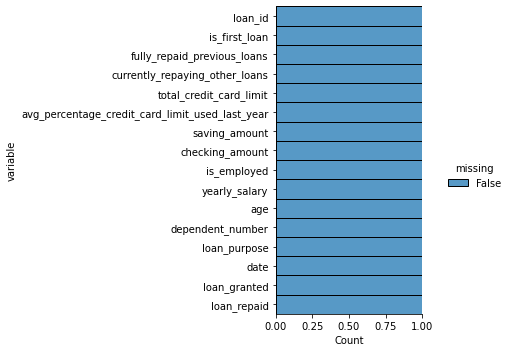

In [257]:
#visualizing the clean value to view the dataset
plt.figure(figsize=(12,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

### Visualizing Cleaned Data

In [258]:
df_loan_purpose =df.groupby(["loan_purpose"])["loan_id"].count().reset_index(name="no_of_applications")
df_loan_purpose

,loan_purpose,no_of_applications
0,business,3730
1,emergency_funds,3006
2,home,4169
3,investment,3683
4,other,2633


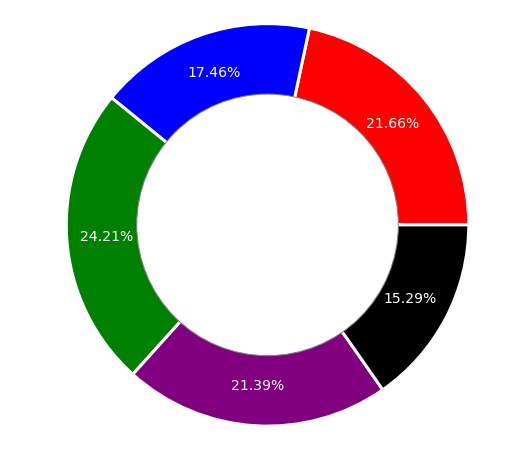

In [259]:
plt.figure(figsize=(8, 8))
labels = df_loan_purpose['loan_purpose']
sizes = df_loan_purpose['no_of_applications']
colors = ['red', 'blue', 'green', 'purple', 'black']
textprops = {"fontsize":14,'color':'white'}
plt.pie(sizes, labels=labels, colors=colors,
 autopct= '%.2f%%',
 pctdistance =0.8,
 shadow=False,
 textprops =textprops,
 wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},)
 
centre_circle = plt.Circle((0,0),0.65,color= 'grey', fc='white',linewidth=1.00)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.show()

In [260]:
df_salary_family_size = df.groupby(["dependent_number"])["yearly_salary"].count().reset_index(name = "number_of_application")
df_salary_family_size

,dependent_number,number_of_application
0,0,580
1,1,3431
2,2,3075
3,3,2259
4,4,1659
5,5,1206
6,6,918
7,7,707
8,8,3386


<AxesSubplot:title={'center':'Average And Maximum Salary Per Family Size'}, xlabel='Family Size', ylabel='Number of Application'>

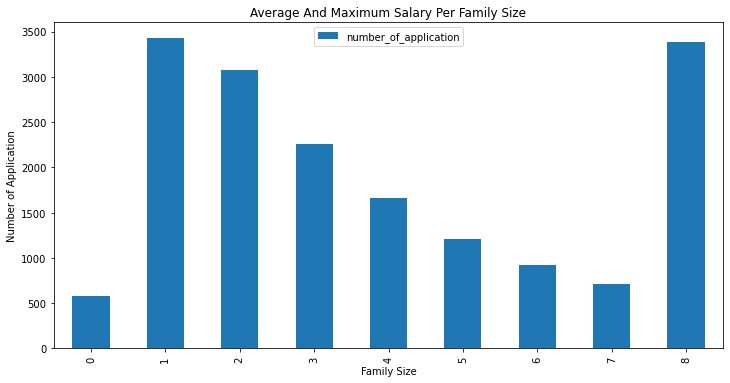

In [261]:

df_salary_family_size.plot(x="dependent_number",
        kind="bar",
        figsize=(12,6),
        title="Average And Maximum Salary Per Family Size",
        xlabel = "Family Size", 
        ylabel = "Number of Application", 
)


<AxesSubplot:xlabel='dependent_number', ylabel='yearly_salary'>

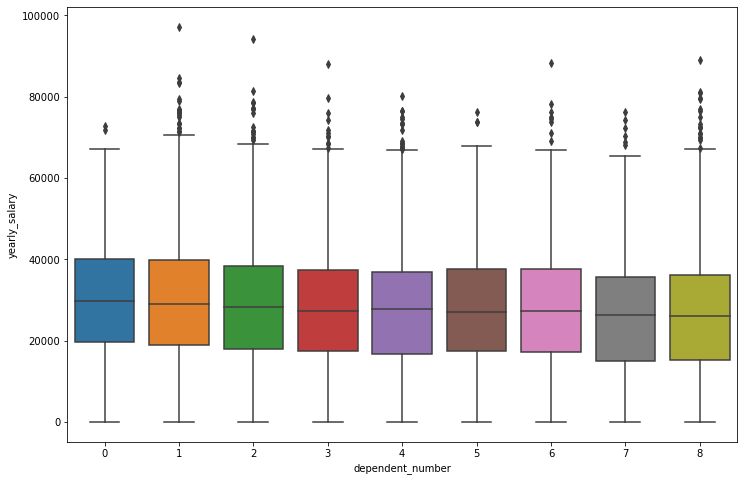

In [262]:
plt.figure(figsize = (12,8))
sns.boxplot(x = 'dependent_number', y = 'yearly_salary', data=df)

### Extracting Month and Day From the Date column for independent Analysis

In [263]:
df['loan_month'] = pd.DatetimeIndex(df['date']).month
df['loan_day'] = pd.DatetimeIndex(df['date']).day
df.head()

,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,loan_purpose,date,loan_granted,loan_repaid,loan_month,loan_day
0,494427,1,1.0,0.0,5100,0.70,738,1716,0,0,43,3,investment,3/7/2012,1,0.0,3,7
1,494462,1,1.0,0.0,2100,0.42,1262,271,1,27300,29,8,home,9/17/2012,1,0.0,9,17
2,494588,0,1.0,1.0,3500,0.72,56,3618,1,31800,26,2,business,2/8/2012,1,0.0,2,8
3,494649,1,1.0,0.0,3800,0.90,1273,2359,1,27800,35,8,home,11/21/2012,1,0.0,11,21
4,494678,0,1.0,1.0,4200,0.78,1052,1962,1,30900,76,8,investment,12/20/2012,1,0.0,12,20


In [264]:
monthly_loan_application = df.groupby("loan_month").agg({"loan_id":"count"})
monthly_loan_application

,loan_id
loan_month,
1,1492
2,1400
3,1470
4,1398
5,1510
6,1379
7,1511
8,1495
9,1341


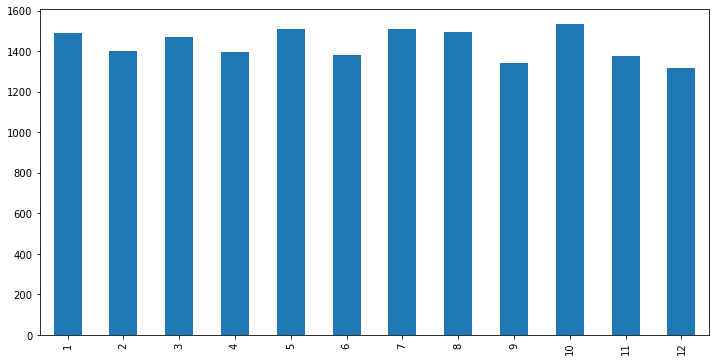

In [265]:
df['loan_month'].value_counts().sort_index().plot(kind='bar', figsize= (12,6));

### Visualizing Age distributions of Loan Applicants

c:\Users\babat\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

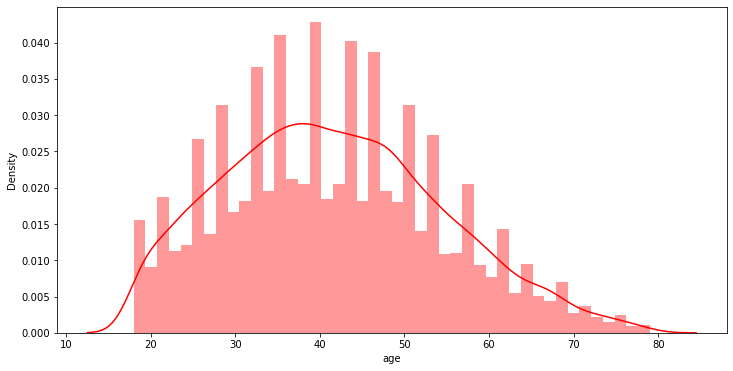

In [266]:
plt.figure(figsize = (12,6))
sns.distplot(df['age'], color= 'red')

In [267]:
df.head()

,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,loan_purpose,date,loan_granted,loan_repaid,loan_month,loan_day
0,494427,1,1.0,0.0,5100,0.70,738,1716,0,0,43,3,investment,3/7/2012,1,0.0,3,7
1,494462,1,1.0,0.0,2100,0.42,1262,271,1,27300,29,8,home,9/17/2012,1,0.0,9,17
2,494588,0,1.0,1.0,3500,0.72,56,3618,1,31800,26,2,business,2/8/2012,1,0.0,2,8
3,494649,1,1.0,0.0,3800,0.90,1273,2359,1,27800,35,8,home,11/21/2012,1,0.0,11,21
4,494678,0,1.0,1.0,4200,0.78,1052,1962,1,30900,76,8,investment,12/20/2012,1,0.0,12,20


### Create a dummy variable from loan purpose column

In [268]:
df['loan_purpose']

0             investment
1                   home
2               business
3                   home
4             investment
              ...       
17216               home
17217    emergency_funds
17218           business
17219           business
17220              other
Name: loan_purpose, Length: 17221, dtype: object

In [269]:
df_loan_purpose = pd.get_dummies(df["loan_purpose"])

In [270]:
df= pd.concat([df, df_loan_purpose], axis = 1)

### Drop Loan_Id, Date and Loan_Purpose Columns then Rearrange the Columns

In [271]:
df = df.drop(["loan_id", "date", "loan_purpose"], axis = 1)
df.head()

,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,loan_granted,loan_repaid,loan_month,loan_day,business,emergency_funds,home,investment,other
0,1,1.0,0.0,5100,0.70,738,1716,0,0,43,3,1,0.0,3,7,0,0,0,1,0
1,1,1.0,0.0,2100,0.42,1262,271,1,27300,29,8,1,0.0,9,17,0,0,1,0,0
2,0,1.0,1.0,3500,0.72,56,3618,1,31800,26,2,1,0.0,2,8,1,0,0,0,0
3,1,1.0,0.0,3800,0.90,1273,2359,1,27800,35,8,1,0.0,11,21,0,0,1,0,0
4,0,1.0,1.0,4200,0.78,1052,1962,1,30900,76,8,1,0.0,12,20,0,0,0,1,0


In [272]:
df.columns.values

array(['is_first_loan', 'fully_repaid_previous_loans',
       'currently_repaying_other_loans', 'total_credit_card_limit',
       'avg_percentage_credit_card_limit_used_last_year', 'saving_amount',
       'checking_amount', 'is_employed', 'yearly_salary', 'age',
       'dependent_number', 'loan_granted', 'loan_repaid', 'loan_month',
       'loan_day', 'business', 'emergency_funds', 'home', 'investment',
       'other'], dtype=object)

In [273]:
df = df.loc[:,['is_first_loan', 'fully_repaid_previous_loans', 'currently_repaying_other_loans', 
            'total_credit_card_limit', 'avg_percentage_credit_card_limit_used_last_year', 'saving_amount',
            'checking_amount', 'is_employed', 'yearly_salary', 'age', 'dependent_number', 'loan_month', 'loan_day',
            'business', 'emergency_funds', 'home', 'investment', 'other', 'loan_granted', 'loan_repaid']]

In [274]:
df.head()

,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,loan_month,loan_day,business,emergency_funds,home,investment,other,loan_granted,loan_repaid
0,1,1.0,0.0,5100,0.70,738,1716,0,0,43,3,3,7,0,0,0,1,0,1,0.0
1,1,1.0,0.0,2100,0.42,1262,271,1,27300,29,8,9,17,0,0,1,0,0,1,0.0
2,0,1.0,1.0,3500,0.72,56,3618,1,31800,26,2,2,8,1,0,0,0,0,1,0.0
3,1,1.0,0.0,3800,0.90,1273,2359,1,27800,35,8,11,21,0,0,1,0,0,1,0.0
4,0,1.0,1.0,4200,0.78,1052,1962,1,30900,76,8,12,20,0,0,0,1,0,1,0.0
